## Pandas: Data Cleaning

#### Interpolation

In the mathematical field of numerical analysis, interpolation is a method of constructing new data points within the range of a discrete set of known data points

### Handling missing data

In [3]:
import pandas as pd
#Now lets try to load the movies file to pandas
movies = pd.read_csv('movielens\movies.csv', sep=',')
print(type(movies))
movies.head()

<class 'pandas.core.frame.DataFrame'>


,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [11]:
#Load ratings file 
ratings = pd.read_csv('movielens\\ratings.csv')
ratings.head()

,userId,movieId,rating,timestamp
0,1,2,3.5,1112486027
1,1,29,3.5,1112484676
2,1,32,3.5,1112484819
3,1,47,3.5,1112484727
4,1,50,3.5,1112484580


In [12]:
#Load the tags file 
tags = pd.read_csv('movielens\\tags.csv')
print(tags.head())
print(tags.index)

   userId  movieId            tag   timestamp
0      18     4141    Mark Waters  1240597180
1      65      208      dark hero  1368150078
2      65      353      dark hero  1368150079
3      65      521  noir thriller  1368149983
4      65      592      dark hero  1368150078
RangeIndex(start=0, stop=465564, step=1)


In [13]:
#For current analysis we will remove the timestamps.

del tags['timestamp']
del ratings['timestamp']

In [5]:
movies.shape

(27278, 3)

In [6]:
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [8]:
#Checking any null row existed, As it is having three columns it will be  displaying results for all columns
movies.isnull().any()


movieId    False
title      False
genres     False
dtype: bool

In [14]:
#Check the null values for ratings
ratings.shape

(20000263, 3)

In [15]:
ratings.isnull().any()

userId     False
movieId    False
rating     False
dtype: bool

In [16]:
#Checking null values for tags
tags.isnull().any()

userId     False
movieId    False
tag         True
dtype: bool

* As we are having null values in the tags DF we will drop that row

In [18]:
tags.shape

(465564, 3)

In [19]:
#Now drop the null values
tags = tags.dropna()

In [20]:
tags.shape

(465548, 3)

### Data visualisation

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002128A72E438>]],
      dtype=object)

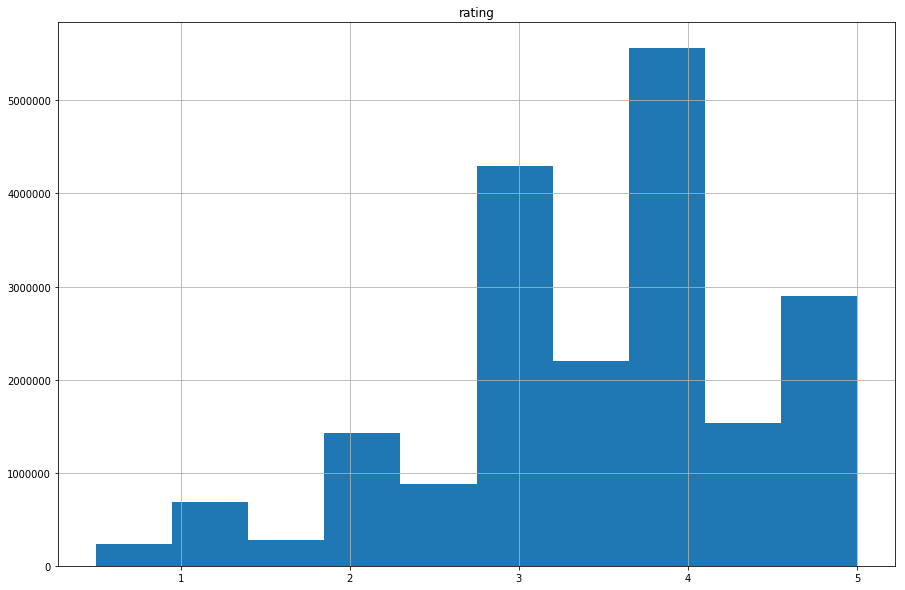

In [26]:
%matplotlib inline
ratings.hist(column='rating', figsize=(15,10))

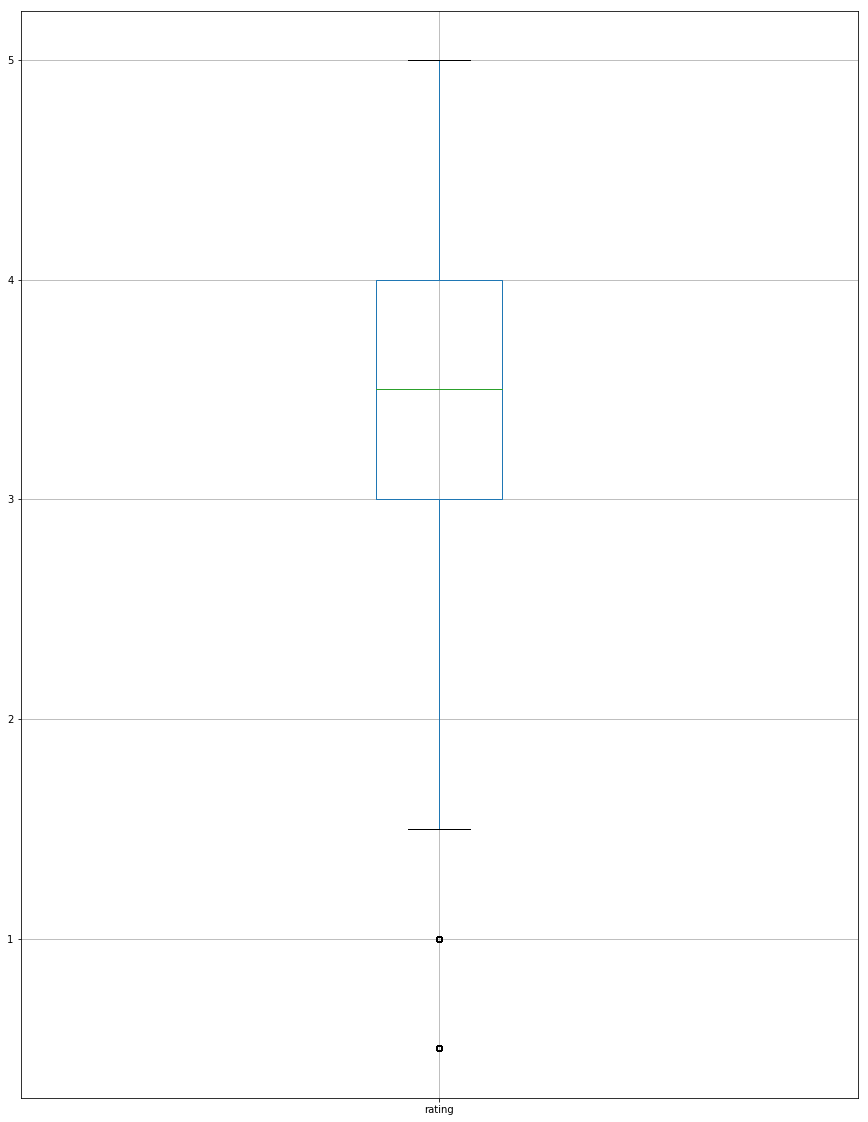

In [28]:
#Generate box plot on the same data
ratings.boxplot(column='rating', figsize=(15, 20))

## Slicing out the columns

In [40]:
tags['tag'].head()

0      Mark Waters
1        dark hero
2        dark hero
3    noir thriller
4        dark hero
Name: tag, dtype: object

In [36]:
movies[['title', 'genres']].head()

,title,genres
0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,Jumanji (1995),Adventure|Children|Fantasy
2,Grumpier Old Men (1995),Comedy|Romance
3,Waiting to Exhale (1995),Comedy|Drama|Romance
4,Father of the Bride Part II (1995),Comedy


In [41]:
ratings[1000:1010]

,userId,movieId,rating
1000,11,527,4.5
1001,11,531,4.5
1002,11,541,4.5
1003,11,546,5.0
1004,11,551,5.0
1005,11,586,4.0
1006,11,587,4.5
1007,11,588,5.0
1008,11,589,4.5
1009,11,592,4.5


In [44]:
#For getting the unique value counts
tag_count = tags['tag'].value_counts()
tag_count[:10]

sci-fi             3384
based on a book    3281
atmospheric        2917
comedy             2779
action             2657
surreal            2427
BD-R               2334
twist ending       2323
funny              2072
dystopia           1991
Name: tag, dtype: int64

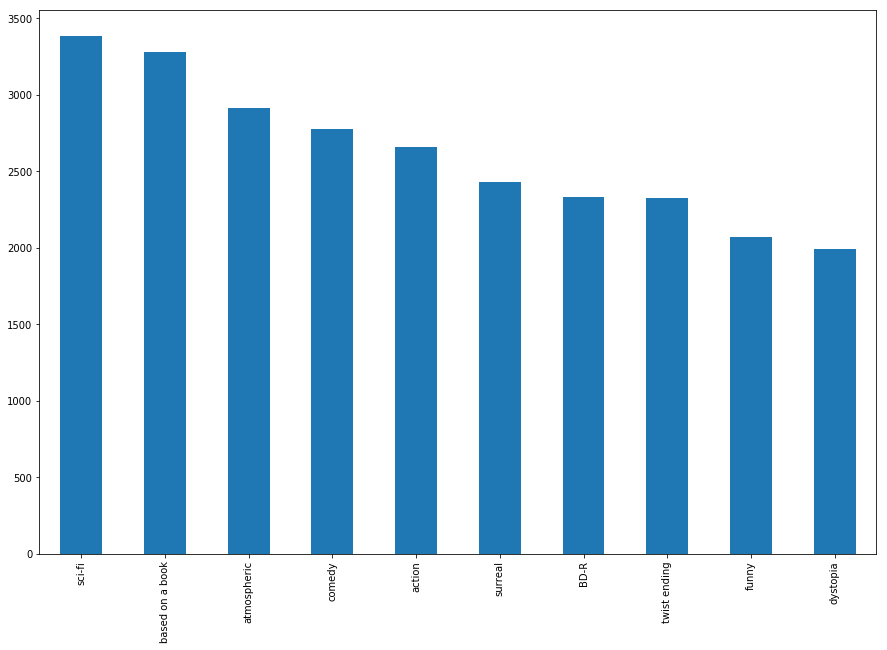

In [49]:
tag_count[:10].plot(kind='bar', figsize=(15,10))

## Filters for selecting rows

In [61]:
highly_rated = ratings['rating'] >= 4
ratings[highly_rated][-5:]

,userId,movieId,rating
20000256,138493,66762,4.5
20000257,138493,68319,4.5
20000258,138493,68954,4.5
20000259,138493,69526,4.5
20000261,138493,70286,5.0


In [64]:
#Finding animation movies
is_animated = movies['genres'].str.contains('Animation')
movies[is_animated][:10]

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
12,13,Balto (1995),Adventure|Animation|Children
47,48,Pocahontas (1995),Animation|Children|Drama|Musical|Romance
236,239,"Goofy Movie, A (1995)",Animation|Children|Comedy|Romance
241,244,Gumby: The Movie (1995),Animation|Children
310,313,"Swan Princess, The (1994)",Animation|Children
360,364,"Lion King, The (1994)",Adventure|Animation|Children|Drama|Musical|IMAX
388,392,"Secret Adventures of Tom Thumb, The (1993)",Adventure|Animation
547,551,"Nightmare Before Christmas, The (1993)",Animation|Children|Fantasy|Musical
553,558,"Pagemaster, The (1994)",Action|Adventure|Animation|Children|Fantasy


In [67]:
#For example I want to find the movies with rating 5
rating_five = ratings['rating'] == 5
ratings[rating_five].head()

,userId,movieId,rating
131,1,4993,5.0
142,1,5952,5.0
158,1,7153,5.0
170,1,8507,5.0
176,2,62,5.0


### Groupby and aggregate


In [68]:
#Get the ratings count
ratings_count = ratings[['movieId', 'rating']].groupby('rating').count()
ratings_count

,movieId
rating,
0.5,239125
1.0,680732
1.5,279252
2.0,1430997
2.5,883398
3.0,4291193
3.5,2200156
4.0,5561926
4.5,1534824


In [71]:
movie_count = ratings[['movieId', 'rating']].groupby('movieId').count()
movie_count.tail()

,rating
movieId,
131254,1
131256,1
131258,1
131260,1
131262,1


In [73]:
movie_count = ratings[['movieId', 'rating']].groupby('movieId').count()
movie_count.head()

,rating
movieId,
1,49695
2,22243
3,12735
4,2756
5,12161


### Merge DataFrames

In [74]:
tags.head()

,userId,movieId,tag
0,18,4141,Mark Waters
1,65,208,dark hero
2,65,353,dark hero
3,65,521,noir thriller
4,65,592,dark hero


In [75]:
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [76]:
merged = movies.merge(tags, on='movieId', how='inner')
merged.head()

,movieId,title,genres,userId,tag
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1644,Watched
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1741,computer animation
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1741,Disney animated feature
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1741,Pixar animation
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1741,TÃ©a Leoni does not star in this movie


In [84]:
#Find the avg rating based on movieId
avg_rating = ratings.groupby('movieId', as_index=False).mean()
del avg_rating['userId']
avg_rating.head()

,movieId,rating
0,1,3.921240
1,2,3.211977
2,3,3.151040
3,4,2.861393
4,5,3.064592


In [87]:
box_office = movies.merge(avg_rating, on='movieId', how='inner')
box_office.tail()

,movieId,title,genres,rating
26739,131254,Kein Bund für's Leben (2007),Comedy,4.0
26740,131256,"Feuer, Eis & Dosenbier (2002)",Comedy,4.0
26741,131258,The Pirates (2014),Adventure,2.5
26742,131260,Rentun Ruusu (2001),(no genres listed),3.0
26743,131262,Innocence (2014),Adventure|Fantasy|Horror,4.0


In [90]:
#Get the highly rated movies from the box_office
highly_rated = box_office['rating'] > 4
box_office[highly_rated].tail()

,movieId,title,genres,rating
26655,130996,The Beautiful Story (1992),Adventure|Drama|Fantasy,5.0
26665,131027,But Forever in My Mind (1999),Comedy|Drama,4.5
26667,131050,Stargate SG-1 Children of the Gods - Final Cut...,Adventure|Sci-Fi|Thriller,5.0
26682,131082,Playground (2009),(no genres listed),4.5
26729,131176,A Second Chance (2014),Drama,4.5


In [92]:
#Get the comidy movie list
comedy_movies = box_office['genres'].str.contains('Comedy')
box_office[comedy_movies].head()

,movieId,title,genres,rating
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.921240
2,3,Grumpier Old Men (1995),Comedy|Romance,3.151040
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,2.861393
4,5,Father of the Bride Part II (1995),Comedy,3.064592
6,7,Sabrina (1995),Comedy|Romance,3.366484


In [93]:
#Now lets try to fetch the comedy movies with high rating
box_office[comedy_movies & highly_rated]

,movieId,title,genres,rating
81,82,Antonia's Line (Antonia) (1995),Comedy|Drama,4.004925
229,232,Eat Drink Man Woman (Yin shi nan nu) (1994),Comedy|Drama|Romance,4.035610
293,296,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller,4.174231
352,356,Forrest Gump (1994),Comedy|Drama|Romance|War,4.029000
602,608,Fargo (1996),Comedy|Crime|Drama|Thriller,4.112359
708,720,Wallace & Gromit: The Best of Aardman Animatio...,Adventure|Animation|Comedy,4.109473
732,745,Wallace & Gromit: A Close Shave (1995),Animation|Children|Comedy,4.167315
737,750,Dr. Strangelove or: How I Learned to Stop Worr...,Comedy|War,4.247287
765,778,Trainspotting (1996),Comedy|Crime|Drama,4.011234
881,898,"Philadelphia Story, The (1940)",Comedy|Drama|Romance,4.171426
